In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
def sigmoid(x,a,b):
    return 256*(1/(1+np.exp(-(x-1)/b)))/(img1.shape[0]*img1.shape[1])

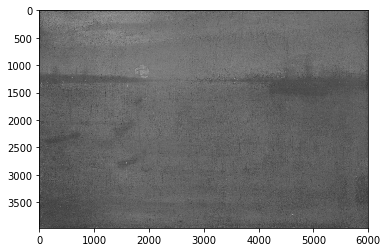

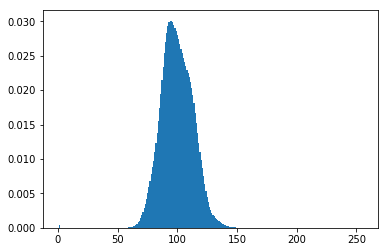

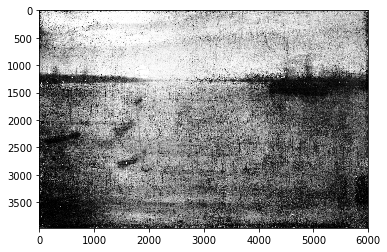

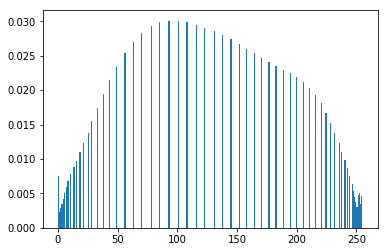

In [83]:
img1 = misc.imread('pc6.jpg',mode="L")
plt.imshow(img1)
plt.gray()
plt.show()
#print(img1.shape)
#specified = np.concatenate(((np.ones(shape=128)/128), (np.zeros(shape=(128)))),0)
#specified = np.concatenate(((np.zeros(shape=(120-15))), (np.ones(shape=46)/46) , (np.zeros(shape=(120-15)))),0)
specified = np.ones(shape=(256))/256
x = np.linspace(0,10,img1.shape[0]*img1.shape[1])
#specified = sigmoid(x,5,10)

#myexacthistspec(img1,specified,5)
myhistspec(img1,specified)

In [81]:
def myhistspec(img,specified):
    M = img.shape[0]
    N = img.shape[1]
    img2 = img
    arr,bins,patches = plt.hist(img.ravel(),bins=256,range=(0,255),normed='True')
    arr = 255 * np.cumsum(arr)
    #print(max(arr))
    plt.show()
    specified_arr = 255 * np.cumsum(specified)
    for i in range(arr.shape[0]):
        for j in range(1,specified_arr.shape[0]):
            if(arr[i] < specified_arr[j]):
                #Assigning intensity (mapping) of the desired histograms cdf
                arr[i] = j - 1
                break
    #print((arr.shape))
    for i in range(M):
        for j in range(N):
            img2[i][j] = int(arr[img2[i][j]])
    plt.imshow(img2)
    plt.show()
    arr2,bins,patches = plt.hist(img2.ravel(),bins=256,range=(0,255),normed='True')
    #print(arr2.shape)
    plt.show()

In [4]:
def find_avg(x,y,img,k):
    avg = 0
    total = (2*k + 1)
    xn = x - k
    yn = y - k
    yo = yn
    for i in range(total):
        yn = yo
        for j in range(total):
            if(xn < img.shape[0] and yn < img.shape[1] and xn >= 0 and yn >=0):
                avg += (img[xn][yn] / total**2)
            yn += j
        xn += i
    return avg

In [5]:
def myexacthistspec(img,specified,k):
    M = img.shape[0]
    N = img.shape[1]
    #Finding Bit depth of the given image
    bit_depth = 2 ** ([int(s) for s in str(img.dtype) if s.isdigit()][0])
    new_img = np.zeros(shape=(M*N))
    final_avg = []
    frequecy_distribution = np.zeros(shape=(bit_depth),dtype=np.integer)
    error_frquency = 0
    offset = 0 #For handling the float to integer errors(in specified pdf)
    for j in range(bit_depth):
        error_frquency = error_frquency + specified[j] * M * N - int(specified[j] * M * N)
        if(error_frquency >= 1):
            offset = int(error_frquency)
            error_frquency = error_frquency - offset
        else:
            offset = 0
        frequecy_distribution[j] = int(specified[j] * M * N) + offset   
    
    for i in range(M):
        for j in range(N):
            avg = []
            for cnt in range(k):
                avg.append(find_avg(i,j,img,cnt+1))
            final_avg.append(avg)
    sorted_final_avg = sorted(final_avg)
    dummy = len(final_avg)
    sorted_final_indices = sorted(range(len(final_avg)), key=lambda k: final_avg[k])
    if (len(np.unique(sorted_final_avg,axis=0)) - len(final_avg)):
        print("Not Possible with the value of k = %i" %k)
        print("Exact histogram using Transformation method")
        myhistspec(img,specified)
    else:
        print("Possible with this value of k = %i"%k)
        indice = 0
        for i in range(bit_depth):
            for j in range((indice),(frequecy_distribution[i] + indice)):
                new_img[sorted_final_indices[j]] = i
            indice = indice + frequecy_distribution[i]
        new_img = np.reshape(new_img,(M,N))       
        plt.imshow(new_img)
        plt.show()
        arr,bins,patches = plt.hist(new_img.ravel(),bins=256,range=(0,255),normed='True')
        plt.show()
